In [1]:
from datetime import datetime
from datetime import timedelta
import shapefile
import xml.etree.ElementTree as ET
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
from pyproj import Proj, transform
from pymongo import MongoClient
%matplotlib inline

In [8]:
tree = ET.parse('/media/amassaro/external_2T/telecom_bigdata_2015/data/external_data/xml_incidenti_mar-apr_2015.xml')
root=tree.getroot()
child=list(root)[1]

In [9]:
time=[]
for j in child:
    if 'DataOraIncidente' in j.attrib.keys():
        time.append(j.attrib['DataOraIncidente'])

time=np.array([t[:10]+' '+t[11:] for t in time])
time=np.array([datetime.strptime(t,'%Y-%m-%d %H:%M:%S') for t in time])
day_time_comune=np.array([[t.weekday()+1,t.hour] for t in time])

In [11]:
db=MongoClient()
db=db['call_in_roma']
cur=db['callIn'].find()
total_calls_in={}
times=db['callIn'].distinct('time_interval')
for t in times:
    total_calls_in[t]=0
for c in cur:
    total_calls_in[c['time_interval']]+=c['n_of_calls']
total_calls_in_d={}
keys_orig=total_calls_in.keys()
keys=[datetime.fromtimestamp(t) for t in keys_orig]
for i in range(len(keys_orig)):
    total_calls_in_d[keys[i]]=total_calls_in[keys_orig[i]]
total_calls_in=total_calls_in_d

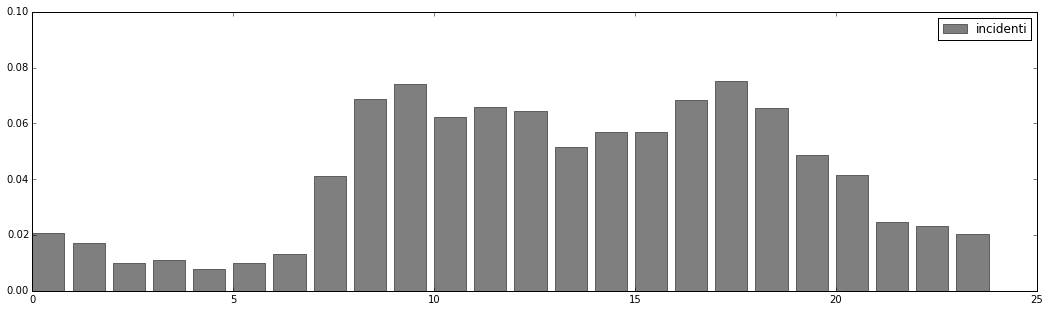

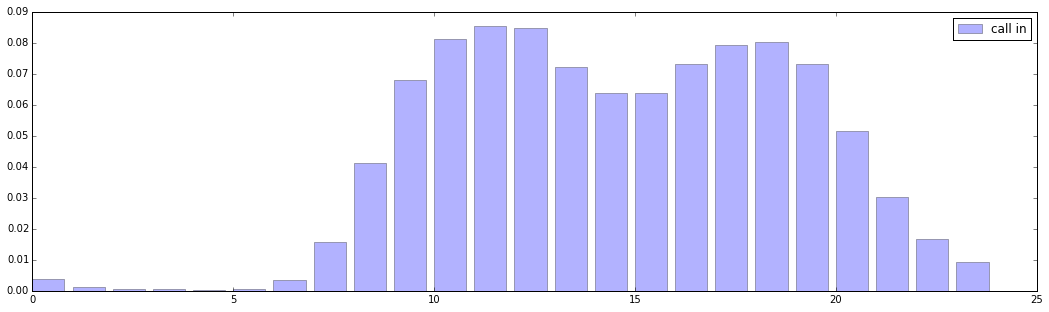

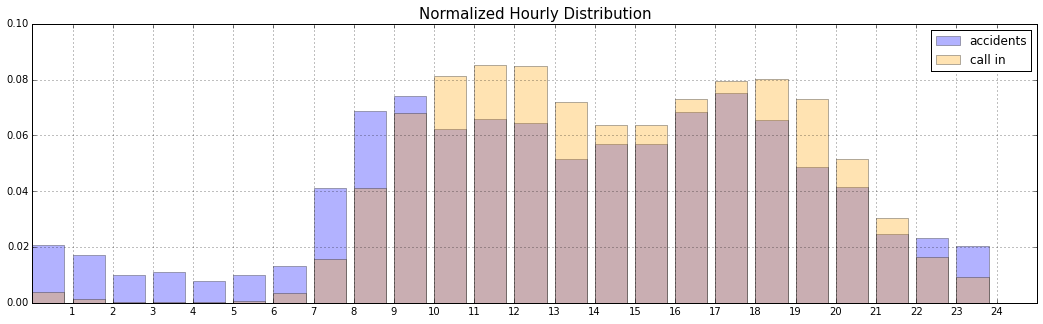

In [14]:
#plt.hist(day_time_comune[:,1],normed=True,bins=list(range(25)),alpha=0.5,color='black',label='incidenti')
H=np.histogram(day_time_comune[:,1],normed=True,bins=list(range(25)))
plt.bar(H[1][:-1],H[0],alpha=0.5,color='black',label='incidenti')
plt.legend(loc='upper right')
plt.ylim([0,.1])
plt.gcf().set_size_inches(18, 5)
plt.show()

heights=np.array([sum([total_calls_in[x] for x in total_calls_in.keys() if x.hour==i]) for i in range(24)])
heights=heights/sum(heights)
plt.bar(list(range(24)),heights,alpha=0.3,label='call in')
plt.gcf().set_size_inches(18, 5)
plt.legend(loc='upper right')
plt.show()


heights=np.array([sum([total_calls_in[x] for x in total_calls_in.keys() if x.hour==i]) for i in range(24)])
heights=heights/sum(heights)
plt.bar(H[1][:-1],H[0],alpha=0.3,color='blue',label='accidents')
plt.bar(list(range(24)),heights,alpha=0.3,color='orange',label='call in')
plt.xticks([i for i in range(1,25)])
plt.title('Normalized Hourly Distribution',size=15)
plt.legend(loc='upper right')
plt.grid()
plt.gcf().set_size_inches(18, 5)
plt.ylim([0,.1])
plt.show()

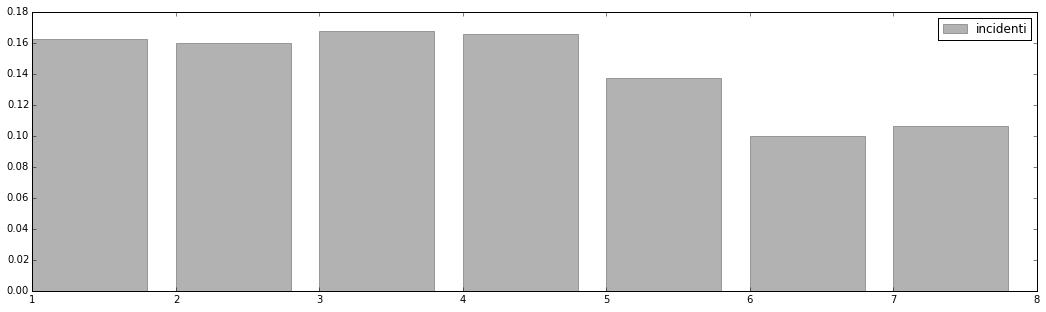

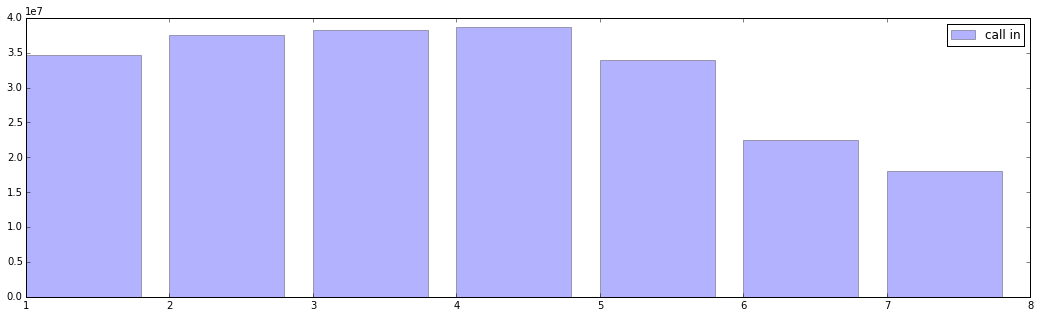

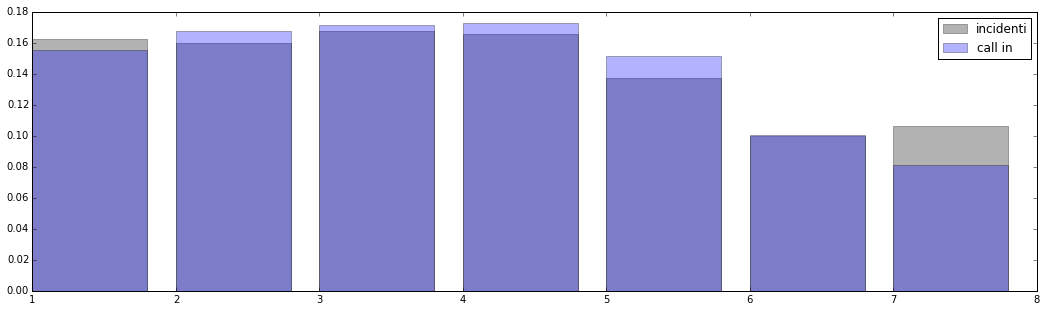

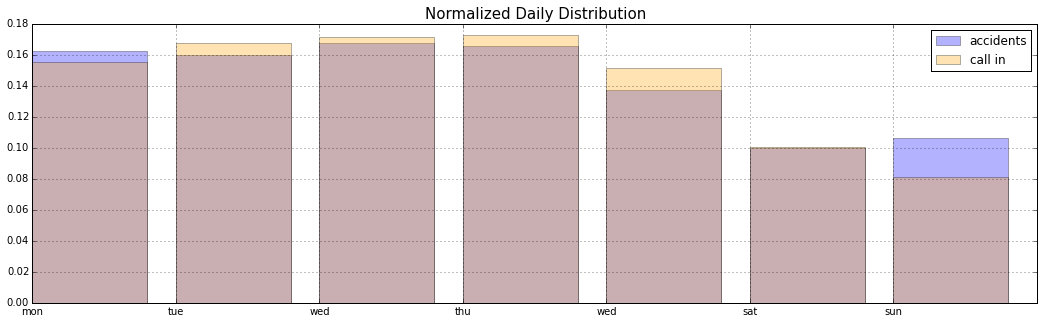

In [15]:
H=np.histogram(day_time_comune[:,0],normed=True,bins=list(range(1,9)))
plt.bar(H[1][:-1],H[0],alpha=0.3,color='black',label='incidenti')
#plt.hist(day_time_comune[:,0],normed=True,bins=list(range(1,9)),alpha=0.5,color='black',label='incidenti')
plt.legend(loc='upper right')
plt.ylim([0,.18])
plt.gcf().set_size_inches(18, 5)
plt.show()

plt.bar(list(range(1,8)),[sum([total_calls_in[x] for x in total_calls_in.keys() if x.weekday()==i]) for i in range(7)],alpha=0.3,color='blue',label='call in')
plt.gcf().set_size_inches(18, 5)
plt.legend(loc='upper right')
plt.show()

heights=np.array([sum([total_calls_in[x] for x in total_calls_in.keys() if x.weekday()==i]) for i in range(7)])
heights=heights/sum(heights)

plt.bar(H[1][:-1],H[0],alpha=0.3,color='black',label='incidenti')
plt.bar(list(range(1,8)),heights,alpha=0.3,color='blue',label='call in')
plt.gcf().set_size_inches(18, 5)
plt.legend(loc='upper right')
plt.show()

plt.bar(H[1][:-1],H[0],alpha=0.3,color='blue',label='accidents')
plt.bar(list(range(1,8)),heights,alpha=0.3,color='orange',label='call in')
plt.gcf().set_size_inches(18, 5)
plt.xticks([1,2,3,4,5,6,7],['mon','tue','wed','thu','wed','sat','sun'])
plt.grid()
plt.title('Normalized Daily Distribution', size=15)
plt.legend(loc='upper right')
plt.show()

mon


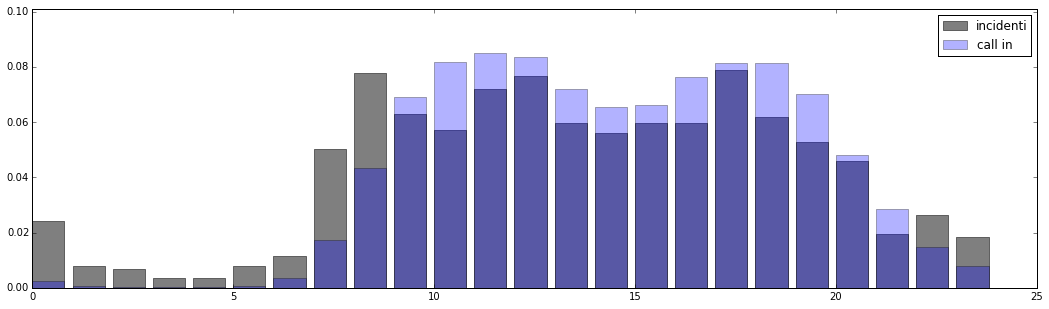

tue


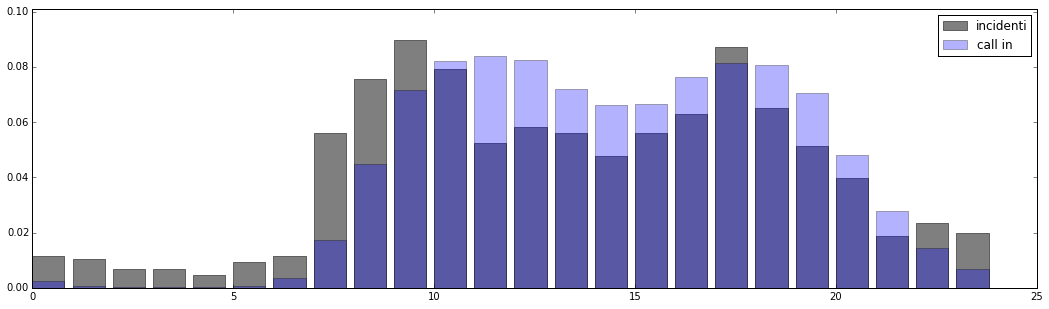

wed


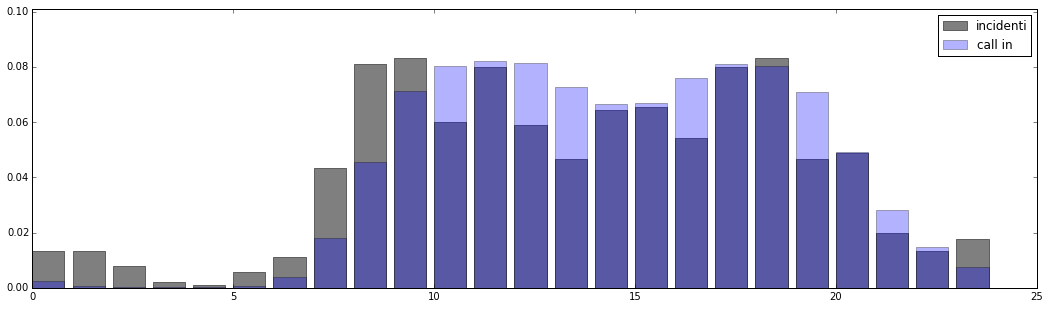

thu


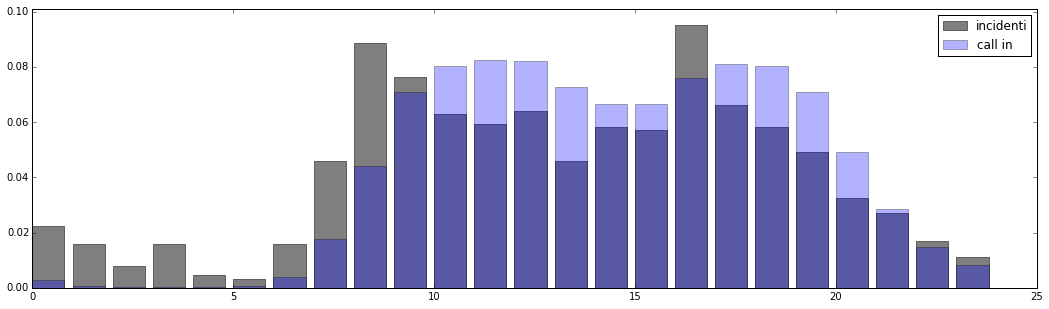

fri


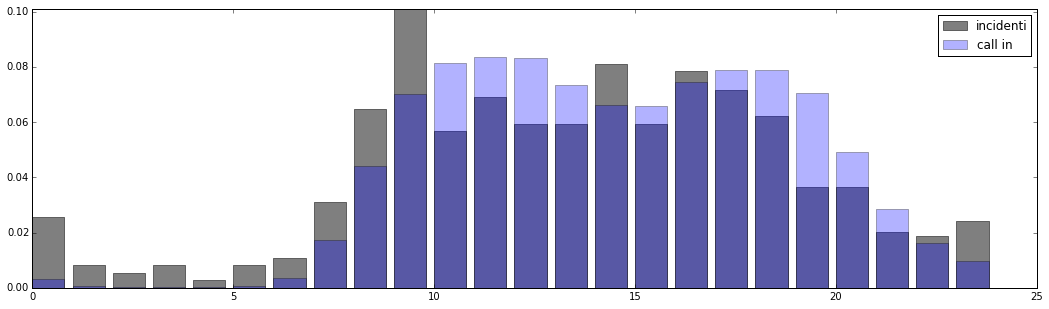

sat


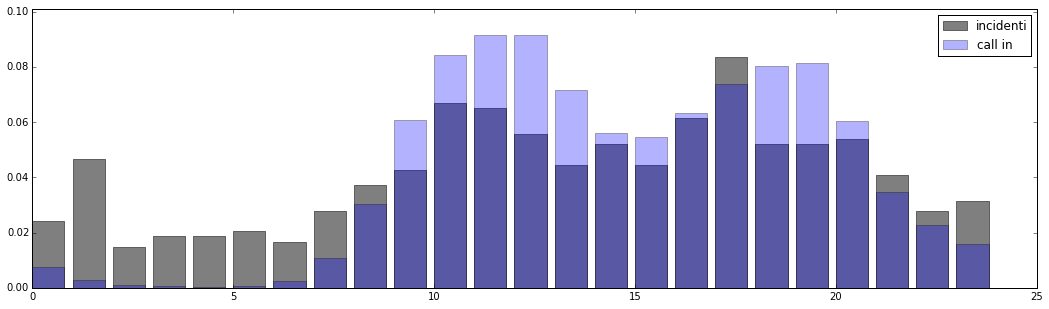

sun


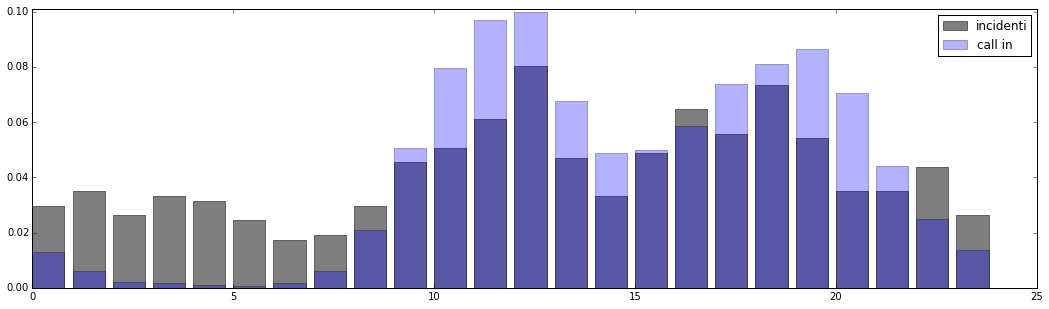

In [12]:
days=['mon','tue','wed','thu','fri','sat','sun']
for d in range(1,8):
    print(days[d-1])
    H=np.histogram(day_time_comune[day_time_comune[:,0]==d,1],normed=True,bins=list(range(25)))
    heights=np.array([sum([total_calls_in[x] for x in total_calls_in.keys() if x.hour==i and x.weekday()+1==d]) for i in range(24)])
    heights=heights/sum(heights)
    plt.bar(H[1][:-1],H[0],alpha=0.5,color='black',label='incidenti')
    plt.bar(list(range(24)),heights,alpha=0.3,label='call in')
    plt.legend(loc='upper right')
    plt.gcf().set_size_inches(18, 5)
    plt.ylim([0,.101])
    plt.show()
